In [12]:
import sys
sys.path.append("../../")

import pickle
from typing import List, Dict

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Markdown
from evalify import Experiment
import numpy as np
from src.config.project_paths import get_data_file_path
from src.embedding.embedded_audio import EmbeddedAudio


In [13]:
###embeddingi zaszumionych audio
real_embeddings_path = "../../data/generated/raw_audio_embeddings_speechbrain-spkrec-ecapa-voxceleb.pkl"
real_embeddings: List[EmbeddedAudio] = pickle.load(open(real_embeddings_path, "rb"))
###embeddingi zaszumionych audio
embeddings_path = "../../data/generated/reduce_noise_audio_embeddings_speechbrain-spkrec-ecapa-voxceleb.pkl"
embeddings: List[EmbeddedAudio] = pickle.load(open(embeddings_path, "rb"))

[EmbeddedAudio(audio_rel_path='/data/vox2_test/wav/id03969/x38Sqv819yE/00110.wav', embedding=tensor([[-7.8870e+00, -2.8183e+01, -2.3252e+01, -2.6106e+01,  4.7654e+01,
          -2.1206e+00,  5.7172e-03,  2.4910e+00, -2.8354e+01,  2.3302e+01,
          -8.0652e+00, -3.9319e+00,  2.2384e+00,  1.7384e+01,  2.2163e+01,
           1.2936e+01,  8.9628e+00, -3.1754e+01, -5.3675e+00,  1.9824e+01,
          -2.3517e+01, -2.7001e+01,  3.1452e+01, -7.7929e+00,  3.1480e+01,
          -2.1313e+01,  2.4520e+00, -4.1835e+00,  1.3830e+01, -7.2690e+00,
          -2.6602e+01, -1.5385e+01,  1.8456e+01,  7.1347e+01, -2.8755e+00,
           1.3907e+01,  1.4830e+01,  4.5861e+01,  9.3622e+00, -8.4703e+00,
           5.0653e+00, -5.4352e+00,  1.0176e+01, -1.6752e+01,  1.9113e+01,
           5.3645e+00, -2.0277e+01, -1.5202e+01, -1.6735e+01,  4.2014e+00,
          -5.0956e+00,  4.1849e+01, -1.4068e+01, -1.5230e+01,  4.7929e+01,
           1.1958e+01,  3.6258e+00, -4.6584e+00, -2.2397e+01,  7.2879e+00,
        

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = {}

for real_audio in real_embeddings:
    real_audio_name = real_audio.audio_rel_path.split('/')[-1]
    user_real = real_audio.audio_rel_path.split('/')[-4:-2]
    real_embedding_reshaped = real_audio.embedding
    # print(real_audio.embedding[0].shape)
    
    for audio in embeddings:
        audio_name = audio.audio_rel_path.split('/')[-1].replace('_reduced_noise', "")
        user_emb = audio.audio_rel_path.split('/')[-4:-2]
        
        if audio_name != real_audio_name and user_real != user_emb:
            other_embedding_reshaped = audio.embedding
            similarity_score = cosine_similarity(real_embedding_reshaped, other_embedding_reshaped)[0][0]
            cosine_similarities[audio.audio_rel_path] = similarity_score  
            

np.mean([np.abs(value) for value in list(cosine_similarities.values())])

0.053448197

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = {}

for real_audio in real_embeddings:
    real_audio_name = real_audio.audio_rel_path.split('/')[-1]
    user_real = real_audio.audio_rel_path.split('/')[-4:-2]
    real_embedding_reshaped = real_audio.embedding
    # print(real_audio.embedding[0].shape)
    
    for audio in embeddings:
        audio_name = audio.audio_rel_path.split('/')[-1].replace('_reduced_noise', "")
        user_emb = audio.audio_rel_path.split('/')[-4:-2]
        
        if user_real == user_emb:
            other_embedding_reshaped = audio.embedding
            similarity_score = cosine_similarity(real_embedding_reshaped, other_embedding_reshaped)[0][0]
            cosine_similarities[audio.audio_rel_path] = similarity_score  
            

np.mean([np.abs(value) for value in list(cosine_similarities.values())])

0.04365934

In [38]:
###embeddingi zaszumionych audio
real_embeddings_path = "../../data/generated/multiply_audio_embeddings_speechbrain-spkrec-ecapa-voxceleb.pkl"
real_embeddings: List[EmbeddedAudio] = pickle.load(open(real_embeddings_path, "rb"))
###embeddingi zaszumionych audio
embeddings_path = "../../data/generated/reduce_noise_audio_embeddings_speechbrain-spkrec-ecapa-voxceleb.pkl"
embeddings: List[EmbeddedAudio] = pickle.load(open(embeddings_path, "rb"))

FileNotFoundError: [Errno 2] No such file or directory: '../../data/generated/multiply_audio_embeddings_speechbrain-spkrec-ecapa-voxceleb.pkl'

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = {}

for real_audio in real_embeddings:
    real_audio_name = real_audio.audio_rel_path.split('/')[-1]
    user_real = real_audio.audio_rel_path.split('/')[-4:-2]
    real_embedding_reshaped = real_audio.embedding
    # print(real_audio.embedding[0].shape)
    
    for audio in embeddings:
        audio_name = audio.audio_rel_path.split('/')[-1].replace('_reduced_noise', "")
        user_emb = audio.audio_rel_path.split('/')[-4:-2]
        
        if audio_name != real_audio_name and user_real != user_emb:
            other_embedding_reshaped = audio.embedding
            similarity_score = cosine_similarity(real_embedding_reshaped, other_embedding_reshaped)[0][0]
            cosine_similarities[audio.audio_rel_path] = similarity_score  
            

np.mean([np.abs(value) for value in list(cosine_similarities.values())])

KeyboardInterrupt: 

---

In [28]:
###annotacje zaszumionych audio

annotations_path = "../../data/generated/annotations_multiply_amplitude.json"
annotations = pd.read_json(annotations_path, orient="records")
annotations

wav_path  user_id gender  \
0     ../../data/generated/amplitude_audio_files/dat...  id03969      f   
1     ../../data/generated/amplitude_audio_files/dat...  id03969      f   
2     ../../data/generated/amplitude_audio_files/dat...  id03969      f   
3     ../../data/generated/amplitude_audio_files/dat...  id03969      f   
4     ../../data/generated/amplitude_audio_files/dat...  id03969      f   
...                                                 ...      ...    ...   
1715  ../../data/generated/amplitude_audio_files/dat...  id01041      m   
1716  ../../data/generated/amplitude_audio_files/dat...  id01041      m   
1717  ../../data/generated/amplitude_audio_files/dat...  id01041      m   
1718  ../../data/generated/amplitude_audio_files/dat...  id01041      m   
1719  ../../data/generated/amplitude_audio_files/dat...  id01041      m   

                                      original_wav_path  
0     ../../data/vox2_test/wav/id03969/x38Sqv819yE/0...  
1     ../../data/vox2_test/wav/id03969/x38Sqv819yE/0...  
2     ../../data/vox2_test/wav/id03969/mEhZ6Yh5p_0/0...  
3     ../../data/vox2_test/wav/id03969/mEhZ6Yh5p_0/0...  
4     ../../data/vox2_test/wav/id03969/mEhZ6Yh5p_0/0...  
...                                                 ...  
1715  ../../data/vox2_test/wav/id01041/VaMsbVehonw/0...  
1716  ../../data/vox2_test/wav/id01041/VaMsbVehonw/0...  
1717  ../../data/vox2_test/wav/id01041/VaMsbVehonw/0...  
1718  ../../data/vox2_test/wav/id01041/EUp7-4jzrx8/0...  
1719  ../../data/vox2_test/wav/id01041/EUp7-4jzrx8/0...  

[1720 rows x 4 columns]

In [29]:
unique_annotations = annotations.drop_duplicates(subset="wav_path")
indexed_annotations = unique_annotations.set_index("wav_path")
audio_path_to_data = indexed_annotations.to_dict(orient="index")
len(audio_path_to_data)

1386

In [30]:
###annotacje odszumionych audio

annotations_reduce_noise_path = "../../data/generated/annotations_reduce_noise.json"
annotations_reduce_noise = pd.read_json(annotations_reduce_noise_path, orient="records")
annotations_reduce_noise

reuced_noise_wav_path  \
0     /data/generated/amplitude_audio_files/data/vox...   
1     /data/generated/amplitude_audio_files/data/vox...   
2     /data/generated/amplitude_audio_files/data/vox...   
3     /data/generated/amplitude_audio_files/data/vox...   
4     /data/generated/amplitude_audio_files/data/vox...   
...                                                 ...   
1381  /data/generated/amplitude_audio_files/data/vox...   
1382  /data/generated/amplitude_audio_files/data/vox...   
1383  /data/generated/amplitude_audio_files/data/vox...   
1384  /data/generated/amplitude_audio_files/data/vox...   
1385  /data/generated/amplitude_audio_files/data/vox...   

                                      original_wav_path  user_id  
0     /data/vox2_test/wav/id08149/msudF6HwuuI/00046_...  id08149  
1     /data/vox2_test/wav/id08149/o0Zdr9Jla7U/00047_...  id08149  
2     /data/vox2_test/wav/id08149/o0Zdr9Jla7U/00048_...  id08149  
3     /data/vox2_test/wav/id08149/o0Zdr9Jla7U/00049_...  id08149  
4     /data/vox2_test/wav/id08149/vxBFGKGXSFA/00059_...  id08149  
...                                                 ...      ...  
1381  /data/vox2_test/wav/id00562/rKTMjAt-gRs/00229_...  id00562  
1382  /data/vox2_test/wav/id00562/rKTMjAt-gRs/00235_...  id00562  
1383  /data/vox2_test/wav/id00562/rKTMjAt-gRs/00231_...  id00562  
1384  /data/vox2_test/wav/id00562/rKTMjAt-gRs/00228_...  id00562  
1385  /data/vox2_test/wav/id00562/rKTMjAt-gRs/00234_...  id00562  

[1386 rows x 3 columns]

In [32]:
int_encoding: Dict[str, int] = {}
count = 0
for user_id in annotations["user_id"].unique():
    if user_id not in int_encoding.keys():
        int_encoding[user_id] = count
        count += 1

In [33]:
embeddings_X = []
user_y = []
for embedded_audio in embeddings:
    audio_data = audio_path_to_data.get(embedded_audio.audio_rel_path, None)
    if audio_data is None:
        continue
    user_id = audio_data["user_id"]
    user_id_int_encoding = int_encoding[user_id]
    embeddings_X.append(embedded_audio.embedding)
    user_y.append(user_id_int_encoding)


In [41]:
embeddings_X[0].size()

torch.Size([2, 192])

In [77]:
user_y[0]

0

In [82]:
list(embeddings_X[0])

[tensor([ 12.8491,  23.9013,  -2.8488,  14.6465,   6.9033,  25.6886,  -6.6829,
          -3.7716,  10.7511,  28.5008,  -9.5160, -15.6894,  -0.4031,  23.0597,
          30.8072, -14.7325,  50.6046,   4.9892,   4.3017, -11.2277, -17.7336,
          70.1127,   5.9380, -10.7856,  26.3884,   1.3520, -22.3793,   1.4294,
          51.9420,   3.2758,  11.4913, -12.1079, -24.5541,  11.1354, -20.0346,
          13.3064,  -8.0621,  34.2560, -12.2072,   9.6603,   3.0073,  -9.0925,
          -1.0348, -39.0425,  43.7845,  17.0640,   9.1533,   8.1165,  -2.8305,
          13.5018,  -3.9181,  -6.8097, -12.9401,  31.0841,  -3.3734,  -4.8564,
         -57.4480,  19.9868,   4.1834,  21.3001,  14.2396, -31.4027, -21.1434,
         -12.4674, -39.3355,  -1.0535,  15.8540, -31.9084,   1.0658, -15.9174,
          18.0928,  28.5977,  -6.2689,  -3.3627,  -2.2954,  10.4599, -14.0189,
          36.8695,  16.6868,  27.1753,  15.1736,  20.8941,  14.1587, -10.4153,
         -34.1265,  -9.2966,  31.1563,   1.5146, -18

In [86]:
experiment = Experiment() 
results = experiment.run(embeddings_X, user_y, metrics=["cosine_similarity"], batch_size=1000)

In [87]:
help(experiment.run)

Help on method run in module evalify.evalify:

run(X: numpy.ndarray, y: numpy.ndarray, metrics: Union[str, Sequence[str]] = 'cosine_similarity', same_class_samples: Union[str, int] = 'full', different_class_samples: Union[str, int, Sequence[Union[str, int]]] = 'minimal', batch_size: Union[str, int, NoneType] = 'best', shuffle: bool = False, seed: Optional[int] = None, return_embeddings: bool = False, p: int = 3) -> pandas.core.frame.DataFrame method of evalify.evalify.Experiment instance
    Runs an experiment for face verification
    
    Args:
        X: Embeddings array
        y: Targets for X as integers
        metrics:
            - 'cosine_similarity'
            - 'pearson_similarity'
            - 'cosine_distance'
            - 'euclidean_distance'
            - 'euclidean_distance_l2'
            - 'minkowski_distance'
            - 'manhattan_distance'
            - 'chebyshev_distance'
            - list/tuple containing more than one of them.
        same_class_samples:

# Experiment results

In [111]:
eer = experiment.calculate_eer()


In [112]:
display(Markdown("### Cosine Similarity"))
display(
    Markdown(f"* EER: {eer['cosine_similarity']['EER']:.4f} @ Threshold {eer['cosine_similarity']['Threshold']:.4f}"))

### Cosine Similarity

* EER: 0.0222 @ Threshold 0.3063

In [113]:
threshold_results = {}
for threshold in np.linspace(0, 1, num=20, endpoint=False):
    threshold_results[threshold] = experiment.evaluate_at_threshold(threshold, "cosine_similarity")

/Users/mkmak/Library/Caches/pypoetry/virtualenvs/voiceauthenticator-TPwQ4E2G-py3.11/lib/python3.11/site-packages/evalify/evalify.py:365: RuntimeWarning: invalid value encountered in scalar divide
  PPV = tp / (tp + fp)  # precision / positive predicted value


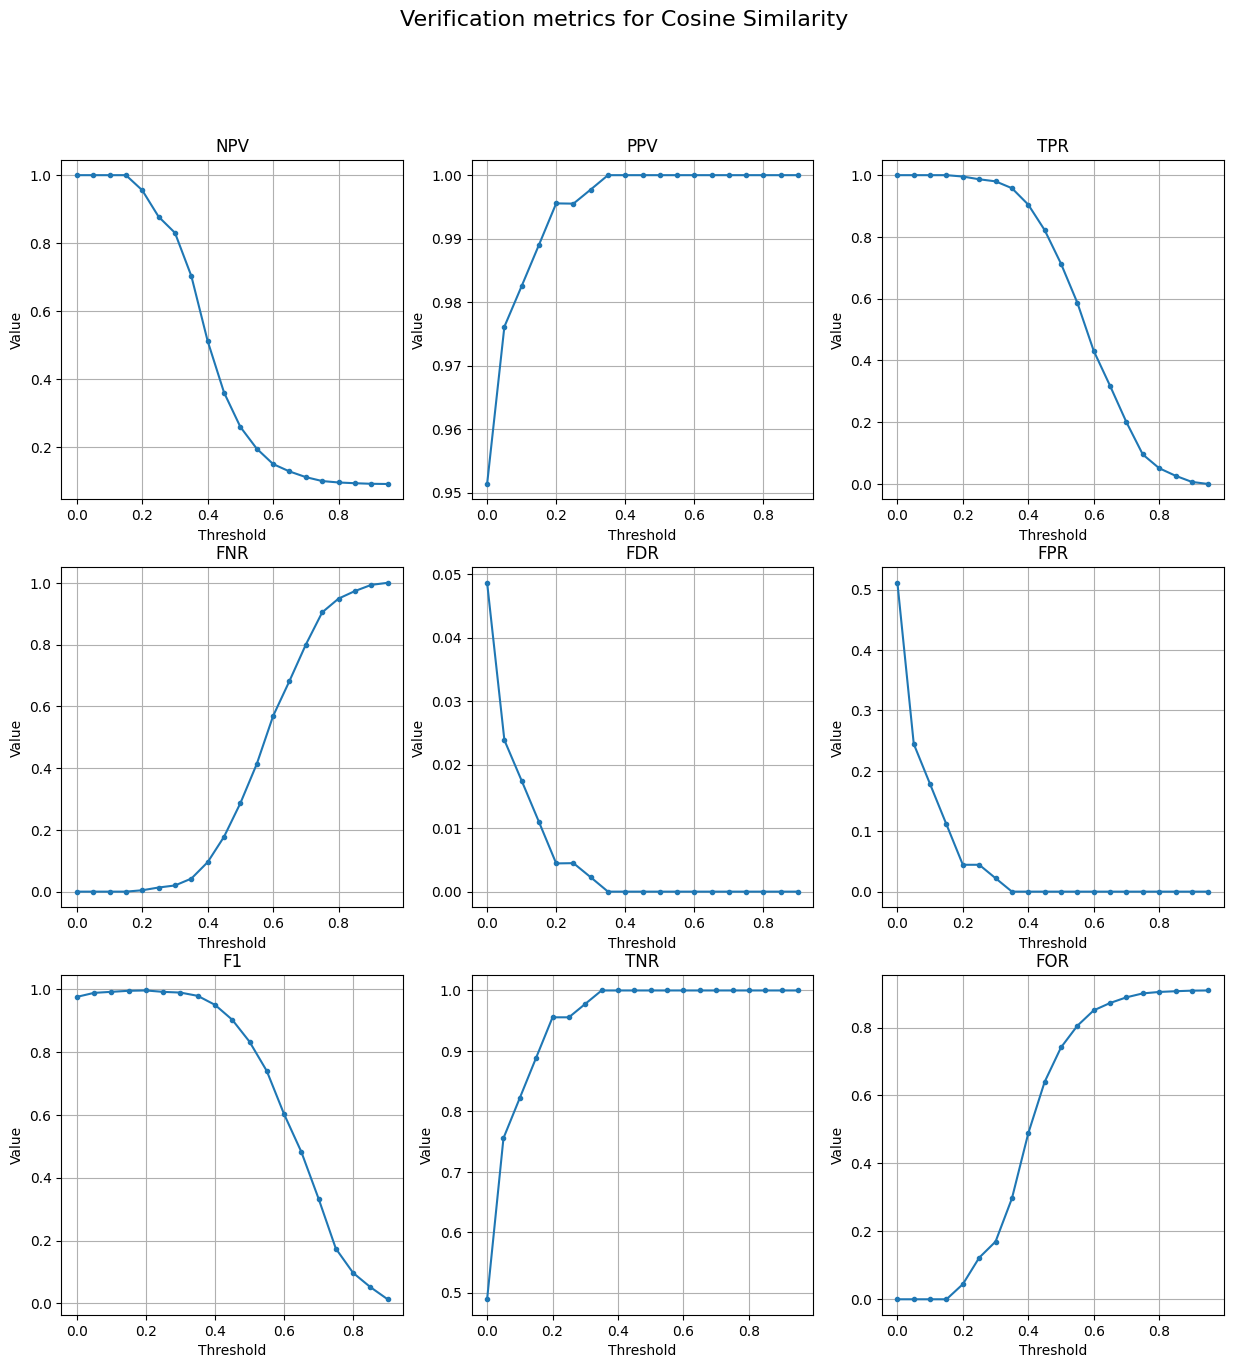

In [114]:
metrics = set()
for details in threshold_results.values():
    metrics.update(details.keys())

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))  # Adjust size as needed
axes = axes.flatten()  # Flatten the array of axes
fig.suptitle("Verification metrics for Cosine Similarity", fontsize=16)

for i, metric in enumerate(metrics):
    thresholds = sorted(threshold_results.keys())  # Get a sorted list of thresholds
    values = [threshold_results[threshold][metric] for threshold in thresholds]

    ax = axes[i]
    ax.plot(thresholds, values, marker=".")
    ax.set_title(metric)
    ax.set_xlabel("Threshold")
    ax.set_ylabel("Value")
    ax.grid(True)